Generating data file path.
File path generation completed.
es         156
Others     213
zxx        400
en        9231
Name: tweet_language, dtype: int64
SocialFlow              158
SocialNewsDesk          174
dlvr.it                 190
TweetDeck               193
Twitter for iPad        389
WordPress.com           425
Others                 1014
Twitter for Android    1301
Twitter for iPhone     2751
Twitter Web App        3405
Name: tweet_source, dtype: int64
-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o
<class 'dict'>
----------------------------------------------------
           tweet_id  tweet_author_id  retweet_count   reply_count  \
count  1.000000e+04     1.000000e+04   10000.000000  10000.000000   
mean   1.543785e+18     5.550844e+17       2.455100      0.898300   
std    1.272087e+14     6.393545e+17      46.067121     12.287809   
min    1.543604e+18     3.662300e+04       0.000000      0.000000   
25%    1.543670e+18

,tweet_id,tweet_text,tweet_time,tweet_author_id,tweet_language,retweet_count,reply_count,like_count,quote_count,tweet_source,negative_score,neutral_score,positive_score,net_score
0,1543994262446129152,July 4 festivities broke from the norm this mo...,2022-07-04 16:24:52+00:00,26577021,en,0,0,0,0,Echobox,0.633709,0.344217,0.022074,Negative
1,1543994242267324416,"Abolish for-profit prisons, prison labor, ensh...",2022-07-04 16:24:48+00:00,1298696814510477313,en,0,0,0,0,Twitter Web App,0.210202,0.650003,0.139795,Neutral
2,1543994215092322304,Justice Thomas has ties to insurrectionists vi...,2022-07-04 16:24:41+00:00,939004384448364545,en,0,0,0,0,Twitter for iPhone,0.531039,0.423884,0.045077,Negative
3,1543994207890718720,"Watch ""How The Supreme Court Killed Roe v. Wad...",2022-07-04 16:24:39+00:00,983201706317037573,en,0,0,0,0,Twitter Web App,0.355341,0.615482,0.029177,Neutral
4,1543994188454313984,#The Republican Plot to Turn Back the Clock Is...,2022-07-04 16:24:35+00:00,1265364249506971650,en,0,0,0,0,IFTTT,0.404848,0.548853,0.046299,Neutral


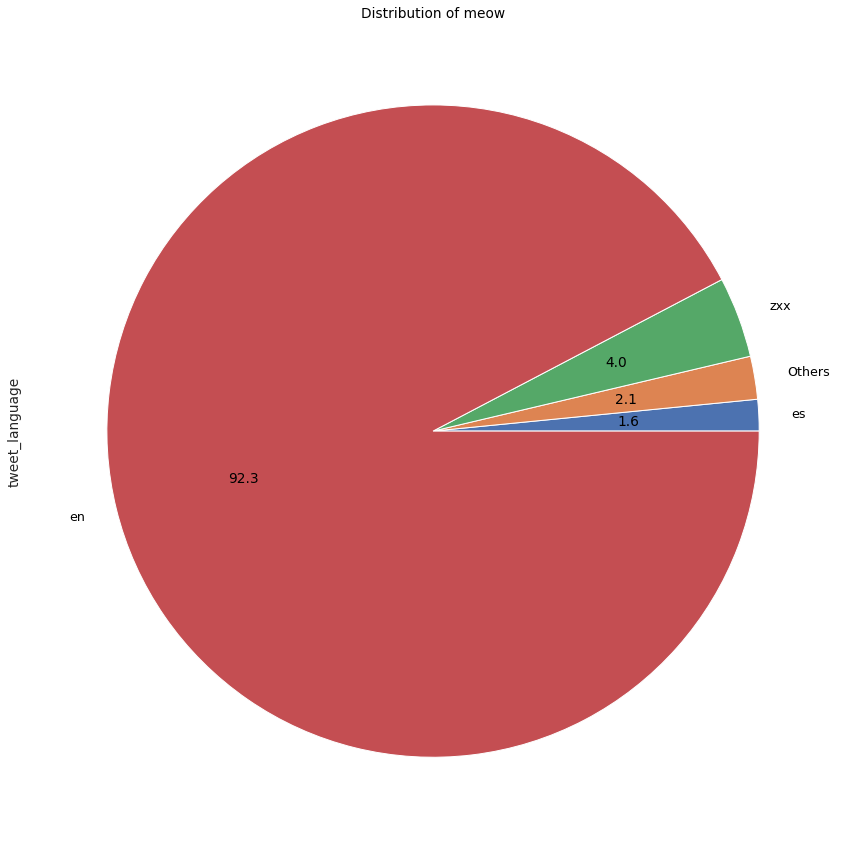

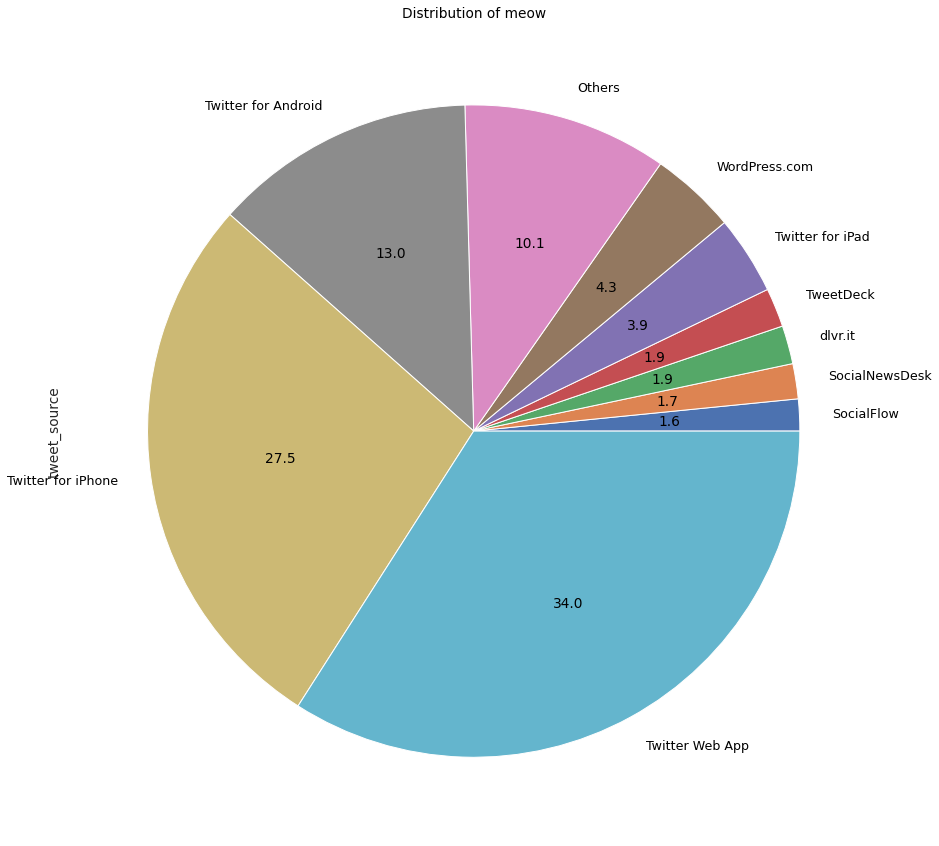

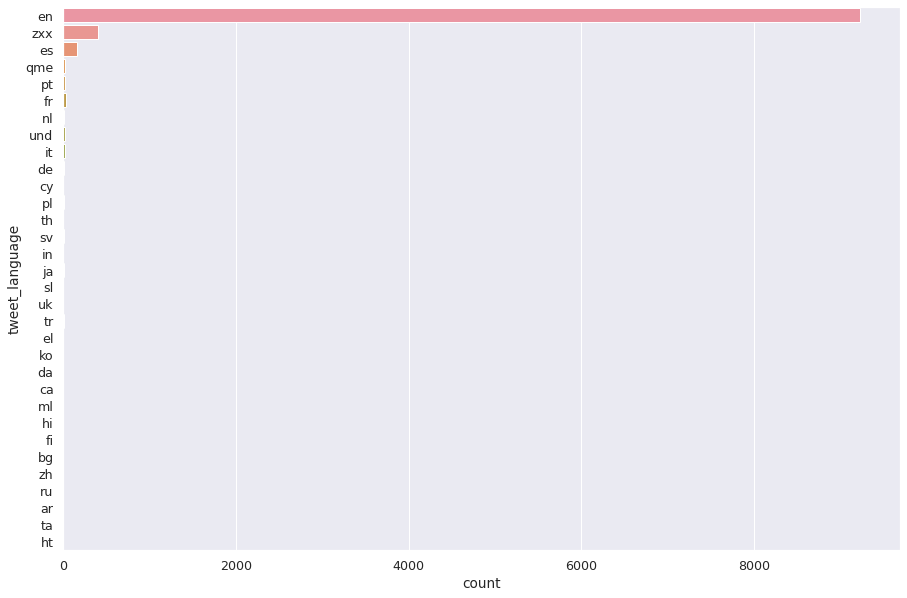

/home/nuclear/PyVenv/Twitter-Exp/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/nuclear/PyVenv/Twitter-Exp/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12510 (\N{KATAKANA LETTER MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/nuclear/PyVenv/Twitter-Exp/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/nuclear/PyVenv/Twitter-Exp/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12488 (\N{KATAKANA LETTER TO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/nuclear/PyVenv/Twitter-Exp/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12491 (\N{KATAK

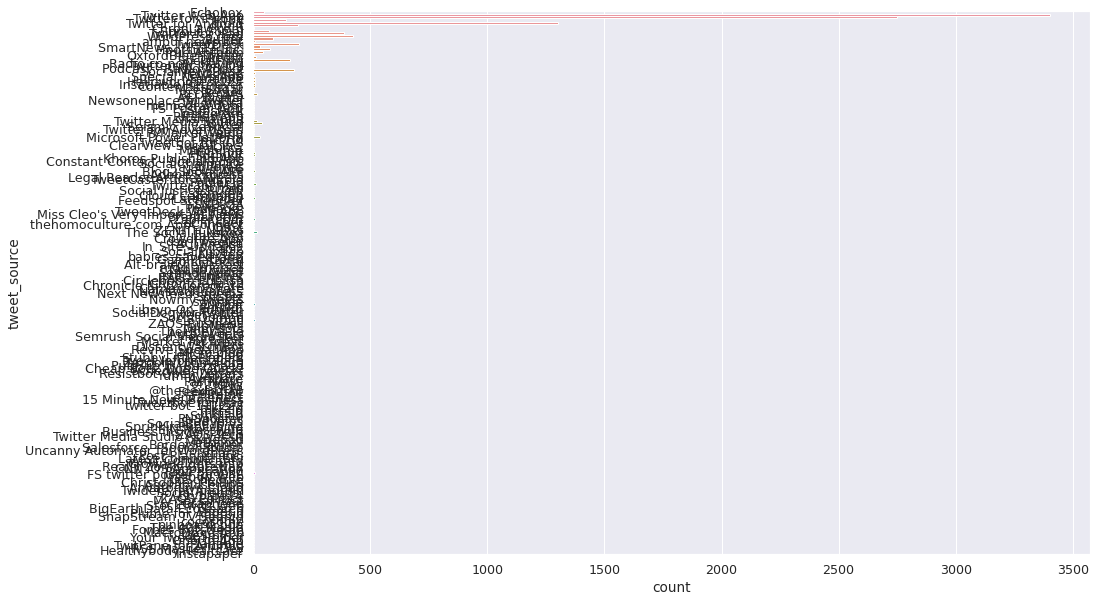

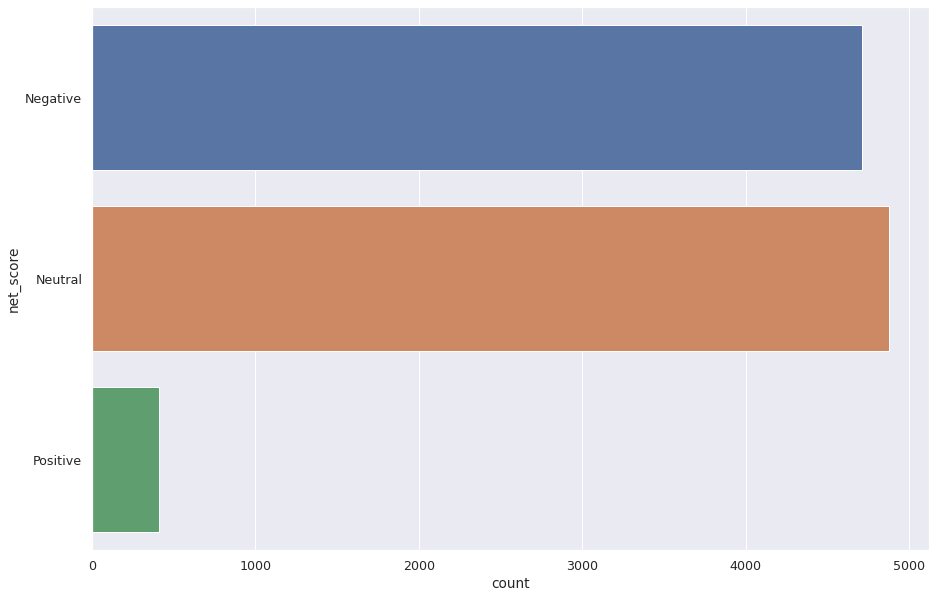

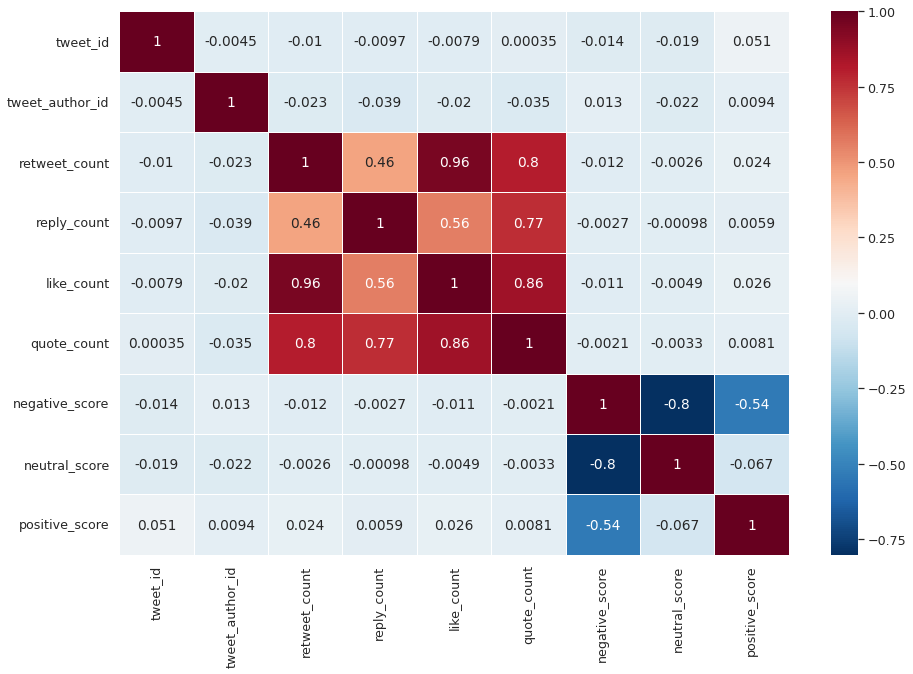

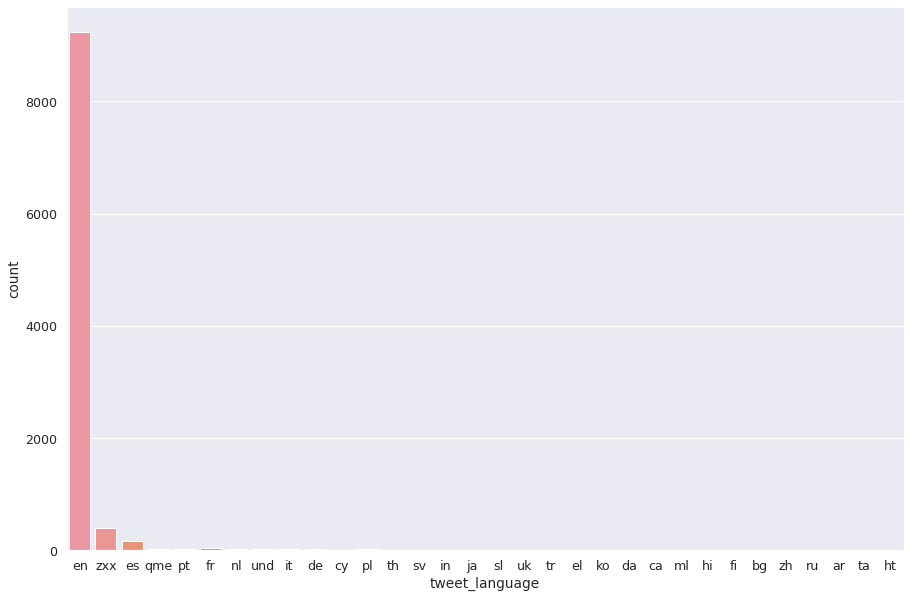

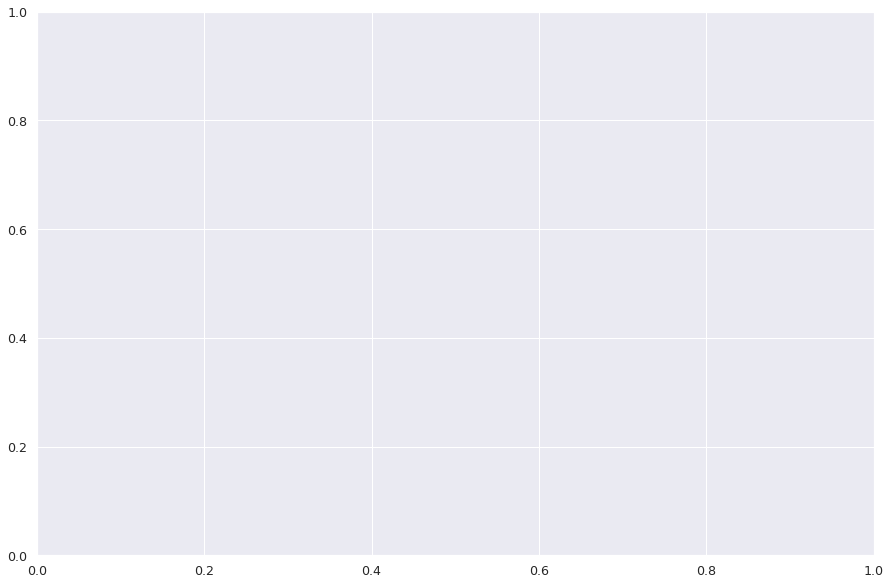

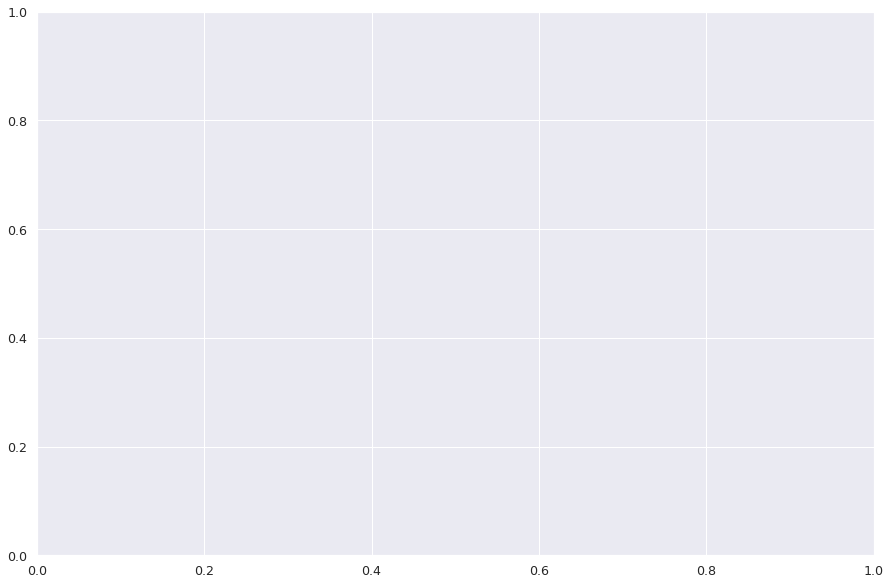

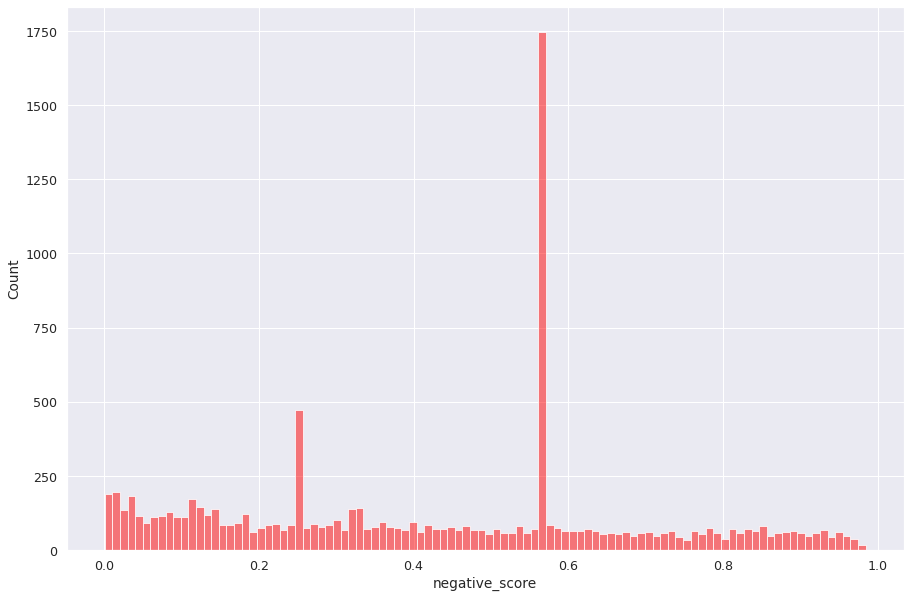

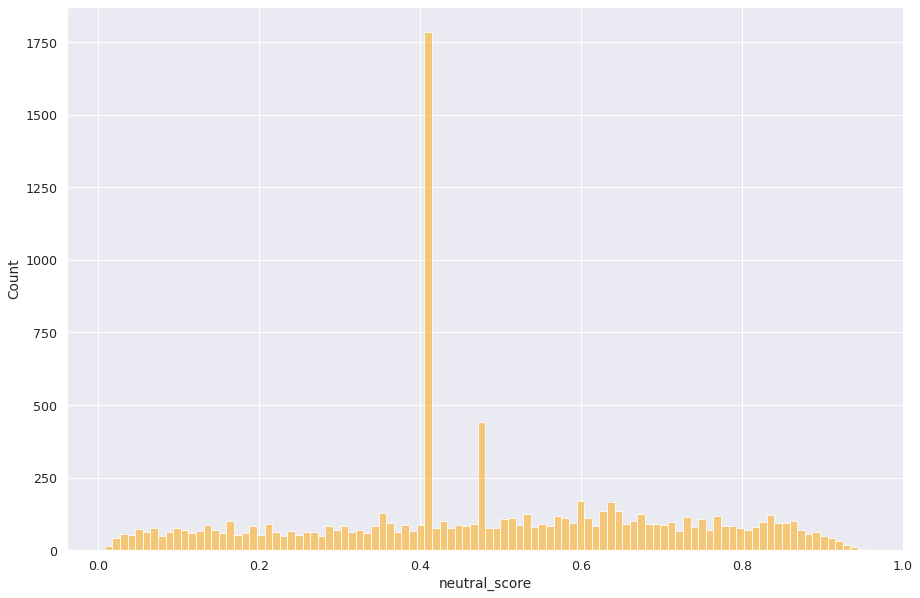

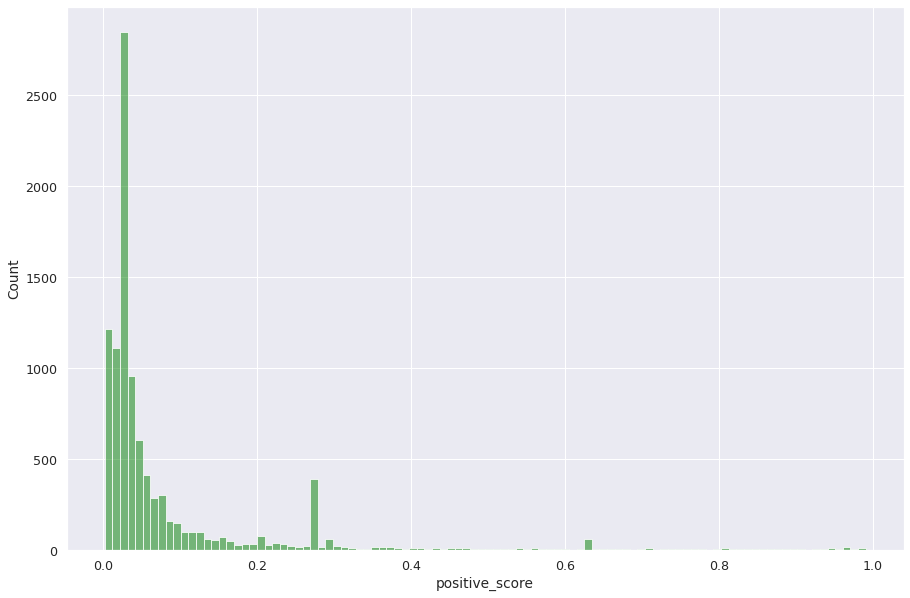

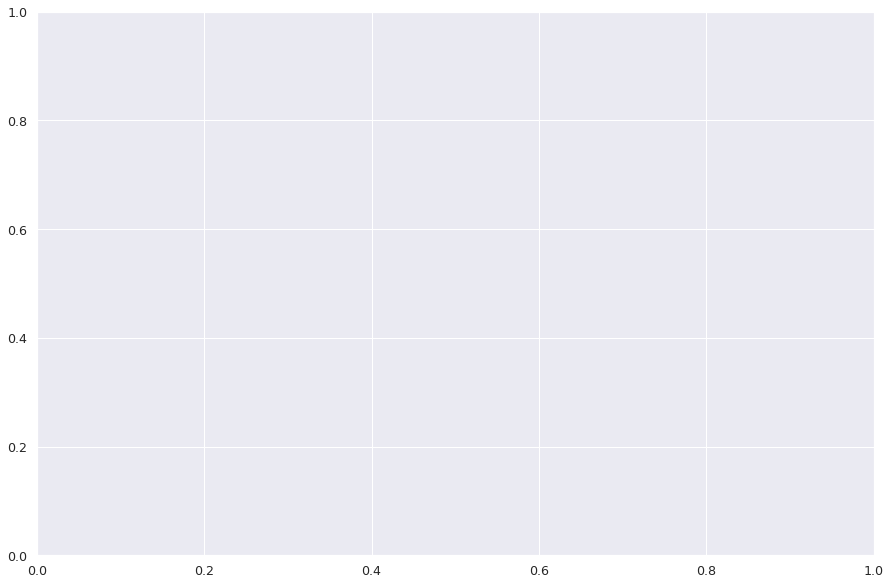

In [4]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt

def file_path(rel_path, data_file):
    '''
    Form paths using os library and user inputs
    Dependencies - None
    '''
    # Create path to data files
    print("Generating data file path.")
    data_dir = os.path.abspath(rel_path)
    data_path = os.path.join(data_dir,data_file)
    print('File path generation completed.')
    return data_path

# Class attributes and methods
class tweet_analysis:
    '''
    Analysis class for objects containing tweet data, statistics and charts
    '''
    def __init__(self,df):
        self.df = df
        self.time = 0
        self.objects = 0
        self.numerics = 0
        self.summary_dictdict = self.summarize_frame()
        self.series_entry_count = self.count_series_entries()
    def summarize_frame(self):
        '''
        Atrributes of the data frame and summary statistics of the data
        Dependencies - None
        '''
        summary_dictdict = (
            {
                'shape' : df.shape, 
                'size' :  df.size,
                'dtypes' : df.dtypes,
                'columns' : df.columns,
                'null_values' : df.isnull().sum(),
                'corr' : df.corr(),
                'prelim_stats' : df.describe()
            }
        )
        return summary_dictdict
    def count_series_entries(self):
        '''
        Count the number of times a string value occurs in a column
        Dependencies - None
        '''
        series_entry_count = {}
        df_series_lst = list(df.columns[df.dtypes == 'object'])
        exception_lst = ['tweet_id', 'tweet_text']
        for series in df_series_lst:
            if series not in exception_lst:
                series_entry_count[series] = self.df[series].value_counts()
        return series_entry_count
    def graphs(self, frctnl_lmt):
        '''
        Draw relevant graphs to describe the data
        '''
        def prep_pie_chart_data(pd_series, frctnl_lmt):
            '''
            Filter data and group values which are less than a user defined
            fractional limit of the total into others
            '''
            pd_series_count = pd_series.sum()
            pd_series_proc = pd_series[pd_series > (frctnl_lmt*pd_series_count)]
            pd_series_proc['Others'] = pd_series[pd_series <= (frctnl_lmt*pd_series_count)].sum()
            pd_series_proc.sort_values(inplace=True)
            print(pd_series_proc)
            return pd_series_proc
        def draw_graphs(lst_pd_series = None,frctnl_lmt = 0, lst_dfs = None):
            '''
            Nested function to draw the graphs
            '''
            def draw_pie_chart(lst_pd_series, frctnl_lmt):
                for pd_series in lst_pd_series:
                    pd_series_proc = prep_pie_chart_data(pd_series, frctnl_lmt)
                    fig, axis = plt.pyplot.subplots()
                    pd_series_proc.plot(kind='pie',
                                                figsize=(15,15), 
                                                autopct='%.1f',
                                                title="Distribution of meow",
                                                ax=axis)
            def draw_bar_chart(lst_pd_series):
                for pd_series in lst_pd_series:
                    fig, axis = plt.pyplot.subplots()
                    sns.countplot(data=self.df, y=pd_series)
            def draw_hist_chart():
                color = ['red','blue','green']
                for pd_series in lst_pd_series:
                    fig, axis = plt.pyplot.subbplots()
                    sns.histplot(x= 'negative_score',bins=bins,color=color[i],alpha=0.5,data=self.df,ax=axis)
                
            # Testing
            draw_pie_chart(lst_pd_series, 0.015)
            draw_bar_chart(lst_pd_series =['tweet_language','tweet_source','net_score'])
        draw_graphs(lst_pd_series=[self.series_entry_count['tweet_language'],self.series_entry_count['tweet_source']],
                    frctnl_lmt=0.015)
        
        
        
            
        # Data for chart
        summary_dict = self.summarize_frame()
        print('-o'*50)
        print(type(summary_dict))
        series_entry_count = self.count_series_entries()
        corr = summary_dict['corr']
        # Set up chart objects
        fig = []
        for i in range(0,7,1):
            fig.append(plt.pyplot.subplots()) # automate f1, ax1 = plt.pyplot.subplots()
        canvas = plt.pyplot.subplots()             

        # Seaborn configuratoin     
        sns.set(rc={"figure.figsize":(15,10),
                    "figure.facecolor":"ffffff",
                    "text.color":"black"},
                    style='darkgrid',
                    font_scale=1.15)
        # Correlation heat map
        sns.heatmap(corr,
            cmap = 'RdBu_r',
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            linewidth = 0.5,
            annot = True, ax=fig[0][1])
        # Bar graph / count plot
        sns.countplot(data=self.df,x = 'tweet_language',ax=fig[1][1])
        # Pie chart
#         tweet_source_proc = prep_pie_chart_data(series_entry_count['tweet_source'], 0.015)        
#         tweet_source_proc.plot(kind='pie',
#                                                 figsize=(15,15), 
#                                                 autopct='%.1f',
#                                                 title="Distribution of tweet sources",
#                                                 ax=fig[2][1])
#         tweet_lang_proc = prep_pie_chart_data(series_entry_count['tweet_language'], 0.015)
#         tweet_lang_proc.plot(kind='pie',
#                                                 figsize=(15,15), 
#                                                 autopct='%.1f',
#                                                 title='Distribution of tweet languages',
#                                                 ax=fig[3][1])
        # Histograms
        binwidth = 0.005
        bins=100
        sns.histplot(x= 'negative_score',bins=bins,color='red',alpha=0.5,data=self.df,ax=fig[4][1])
        sns.histplot(x= 'neutral_score',bins=bins,color='orange',alpha=0.5,data=self.df,ax=fig[5][1])
        sns.histplot(x= 'positive_score',bins=bins,color='green',alpha=0.5,data=self.df,ax=fig[6][1])

        
fname = 'roe-wade-10000-original-sentiment-added.json'
df = pd.read_json(file_path("../Data/", fname))        
# df = pd.read()
a1 = tweet_analysis(df)
a1_summary = a1.summarize_frame()
a1.graphs(0.015)
series_entries_count = a1.count_series_entries()
print('----------------------------------------------------')
print(a1_summary['prelim_stats'])
df.head()
# print(a1_summary)
# print(a1.df)
# print("Object attributes: ")
# for key in a1_summary.keys():
#     print("-----------------------------------------------------------------------------")
#     print(key)
#     print(type(a1_summary[key]))
#     print(a1_summary[key])
# for key in series_entries_count.keys():
#     print("-----------------------------------------------------------------------------")
#     print(key)
#     print(type(series_entries_count[key]))
#     print(series_entries_count[key])
    
# print(type(df.isnull().sum()))

10000.410132    1
9999.924244     1
9999.120564     1
10000.922297    1
10002.790748    1
               ..
9999.554984     1
10001.097537    1
9998.186923     1
10000.330665    1
10000.033824    1
Length: 1000000, dtype: int64
[10000.41013218 10000.21763191  9999.54137814 ... 10001.00726272
 10000.0919898  10000.03382384]


10000.410132    1
9999.924244     1
9999.120564     1
10000.922297    1
10002.790748    1
               ..
9999.554984     1
10001.097537    1
9998.186923     1
10000.330665    1
10000.033824    1
Length: 1000000, dtype: int64

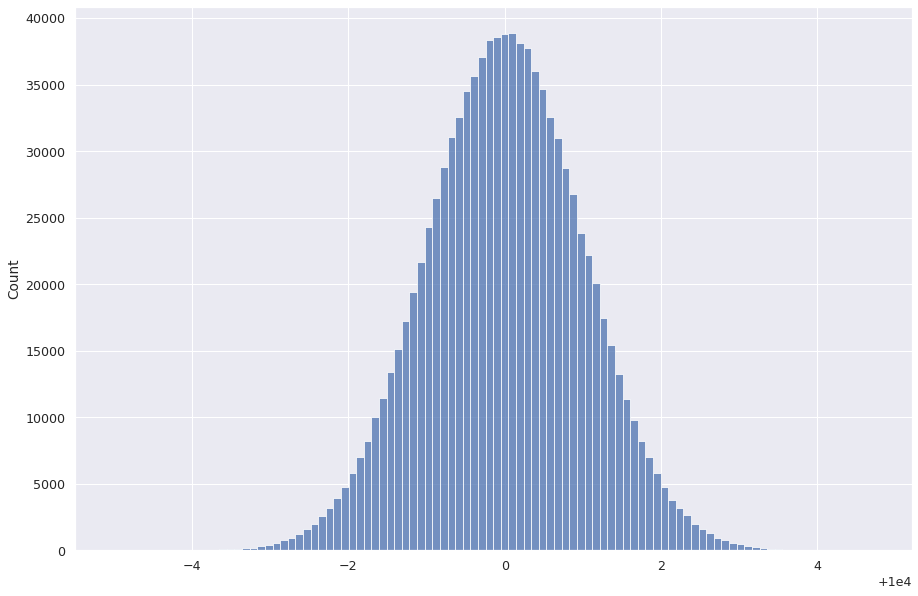

In [51]:
x=np.random.normal(10000,size=1000000)
x_pd = pd.Series(x)
print(x_pd.value_counts())
sns.histplot(x=x, bins=100)
print(x)
x_pd.value_counts()

In [1]:
# Class call
import pandas as pd
data_file_path = '/home/nuclear/Stuff/PythonPrograms/Twitter-API-Explorer/Data/roe-wade-10000-roberta-analysis-v2.csv'
df = pd.read_csv(data_file_path)
df.drop(df.columns[[0]],axis = 1, inplace = True)
df['tweet_id'] = df['tweet_id'].astype(str)
# print(df['tweet_time'])
df['tweet_time'] = pd.to_datetime(df['tweet_time'])
# print(df['tweet_time'])
# df['tweet_time'] = df['tweet_id'].astype(datetime)
print(type(df.dtypes))
for i in df.dtypes:
    print(i)
print(df.columns)
cols = [df.columns]
print(type(cols))
for i in cols:
    print(i)
mylist = [1,2,3]
print(mylist)
for i in df.columns:
    print(i)
cols = list(df.columns)
# print(cols)
# print(df.loc[0])
print('-----------------------------------------------')
things = [list(df.columns),list(df.dtypes)]
print(things[1][1])
print(len(list(df.columns)))
print(len(list(df.dtypes)))
print('-----------------------------------------------')
print(type(df['tweet_id'].dtype))
print(df['tweet_id'].dtype == 'object')
print(type(df['quote_count'].dtype))
print(df['quote_count'].dtype == 'int64')
print('----------------------------------------------')
print(df.dtypes)
print('integer data types:')
print(df.dtypes[df.dtypes=='int64'])
print('----------------------------------------------')
print(type(df.describe()))
print(df.size)
print('----------------------------------------------')
print(df.info())
print(type(df.isnull()))
print(type(df.isnull().sum()))
print(df.isnull().sum())
print(df.info())
print(df.columns)

df.head()

<class 'pandas.core.series.Series'>
object
object
datetime64[ns, UTC]
int64
object
int64
int64
int64
int64
object
float64
float64
float64
Index(['tweet_id', 'tweet_text', 'tweet_time', 'tweet_author_id',
       'tweet_language', 'retweet_count', 'reply_count', 'like_count',
       'quote_count', 'tweet_source', 'negative_score', 'neutral_score',
       'positive_score'],
      dtype='object')
<class 'list'>
Index(['tweet_id', 'tweet_text', 'tweet_time', 'tweet_author_id',
       'tweet_language', 'retweet_count', 'reply_count', 'like_count',
       'quote_count', 'tweet_source', 'negative_score', 'neutral_score',
       'positive_score'],
      dtype='object')
[1, 2, 3]
tweet_id
tweet_text
tweet_time
tweet_author_id
tweet_language
retweet_count
reply_count
like_count
quote_count
tweet_source
negative_score
neutral_score
positive_score
-----------------------------------------------
object
13
13
-----------------------------------------------
<class 'numpy.dtype[object_]'>
True
<class '

,tweet_id,tweet_text,tweet_time,tweet_author_id,tweet_language,retweet_count,reply_count,like_count,quote_count,tweet_source,negative_score,neutral_score,positive_score
0,1543994262446129154,July 4 festivities broke from the norm this mo...,2022-07-04 16:24:52+00:00,26577021,en,0,0,0,0,Echobox,0.633709,0.344217,0.022074
1,1543994242267324416,"Abolish for-profit prisons, prison labor, ensh...",2022-07-04 16:24:48+00:00,1298696814510477313,en,0,0,0,0,Twitter Web App,0.210202,0.650003,0.139795
2,1543994215092322311,Justice Thomas has ties to insurrectionists vi...,2022-07-04 16:24:41+00:00,939004384448364545,en,0,0,0,0,Twitter for iPhone,0.531039,0.423884,0.045077
3,1543994207890718728,"Watch ""How The Supreme Court Killed Roe v. Wad...",2022-07-04 16:24:39+00:00,983201706317037573,en,0,0,0,0,Twitter Web App,0.355341,0.615482,0.029177
4,1543994188454313985,#The Republican Plot to Turn Back the Clock Is...,2022-07-04 16:24:35+00:00,1265364249506971650,en,0,0,0,0,IFTTT,0.404848,0.548853,0.046299


In [69]:
# Testing
print(df['like_count'] > 10)
df_high_like = df[df['like_count'] > 100]
# df_high_like.drop(['index'], inplace =True)
df_only_android = df[df['tweet_source'] == 'Twitter for Android']
# df_high_like.reset_index(inplace = True)
# df_high_like.drop(['index'], axis = 1, inplace = True)
# df_high_like.drop('index', axis=1, inplace=True) 
# df_high_like.head()
df_merge = df_high_like.merge(df_only_android,how='outer')
print(df_high_like.shape)
print(df_only_android.shape)
print(df_merge.shape)
df_merge.head()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: like_count, Length: 10000, dtype: bool
(99, 13)
(1301, 13)
(1387, 13)


,tweet_id,tweet_text,tweet_time,tweet_author_id,tweet_language,retweet_count,reply_count,like_count,quote_count,tweet_source,negative_score,neutral_score,positive_score
0,1543983210362650625,2022 was:\n\n- Massive layoffs\n- Racially cha...,2022-07-04 15:40:57+00:00,2573380344,en,4,17,102,3,Twitter for Android,0.881530,0.106145,0.012325
1,1543982190471544832,Veterans worry about the erosion of their cons...,2022-07-04 15:36:54+00:00,42518865,en,45,3,116,1,Twitter for iPhone,0.650231,0.335518,0.014251
2,1543982163309338624,"""Independence Day"" right after overturning Roe...",2022-07-04 15:36:48+00:00,45882011,en,34,33,250,9,Twitter Web App,0.879179,0.114117,0.006704
3,1543978978825965569,BREAKING REPORT: Woke employee who REFUSED TO ...,2022-07-04 15:24:08+00:00,4765364386,en,321,99,1669,34,Twitter Web App,0.587566,0.397680,0.014754
4,1543974898225356806,To anyone finding it hard to celebrate indepen...,2022-07-04 15:07:56+00:00,40931973,en,25,10,126,1,TweetDeck,0.078480,0.609368,0.312152


In [55]:
# Testing
df1 = pd.DataFrame({'A': [1,2,3], 'B':['a','b','c']})
df2 = pd.DataFrame({'A': [1,5,6], 'B':['a','e','f']})
ds1 = pd.Series([10,20,30])
ds2 = pd.Series([10,40,60])
print(df1)
print()
print(df2)
print()
df_merge = df1.merge(df2, how ='outer')
# df_merge = df1.merge(df2)
print(df_merge)
print()
print(ds1)
print(list(ds1.index))
print(ds1[[0,1]])
print(ds1 > 10)
print(ds1[ds1>10])

print(df.mode())

   A  B
0  1  a
1  2  b
2  3  c

   A  B
0  1  a
1  5  e
2  6  f

   A  B
0  1  a
1  2  b
2  3  c
3  5  e
4  6  f

0    10
1    20
2    30
dtype: int64
[0, 1, 2]
0    10
1    20
dtype: int64
0    False
1     True
2     True
dtype: bool
1    20
2    30
dtype: int64
                 tweet_id                                         tweet_text  \
0     1543603592900345856  . @Google says it will delete location history...   
1     1543603595379105792                                                NaN   
2     1543603596217942016                                                NaN   
3     1543603599686729730                                                NaN   
4     1543603599938187264                                                NaN   
...                   ...                                                ...   
9995  1543994188454313985                                                NaN   
9996  1543994207890718728                                                NaN   
9997  154399421

In [10]:
sns.histplot

SyntaxError: invalid syntax (2755830651.py, line 1)